## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [1]:
import pandas as pd
import numpy as np

In [5]:
file_name="data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


In [11]:
# 2)
x = data['BX_COUNTER'].max()
print('x:', x)

x: 3563


In [12]:
# 3,4)
data['time_ns'] = (data['ORBIT_CNT']*x+data['BX_COUNTER'])*25
data_ac = data['time_ns'].max() - data['time_ns'].min()
print('out how much the data taking lasted:',data_ac,'ns')

out how much the data taking lasted: 980141175 ns


In [13]:
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
0,1,0,123,3869200167,2374,26,344649004934875
1,1,0,124,3869200167,2374,27,344649004934875
2,1,0,63,3869200167,2553,28,344649004939350
3,1,0,64,3869200167,2558,19,344649004939475
4,1,0,64,3869200167,2760,25,344649004944525
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,344649985075875
1310716,1,1,4,3869211171,763,11,344649985075900
1310717,1,0,64,3869211171,764,0,344649985075925
1310718,1,0,139,3869211171,769,0,344649985076050


In [14]:
# 5) 
l = len(data['HEAD'])
data['HEAD'] = np.random.choice([0,1], size = l)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
0,1,0,123,3869200167,2374,26,344649004934875
1,0,0,124,3869200167,2374,27,344649004934875
2,1,0,63,3869200167,2553,28,344649004939350
3,0,0,64,3869200167,2558,19,344649004939475
4,1,0,64,3869200167,2760,25,344649004944525
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,344649985075875
1310716,0,1,4,3869211171,763,11,344649985075900
1310717,0,0,64,3869211171,764,0,344649985075925
1310718,1,0,139,3869211171,769,0,344649985076050


In [20]:
# 6) Create a new DataFrame that contains only the rows with HEAD=1
new_data = data.loc[data['HEAD'] == 1]
new_data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
0,1,0,123,3869200167,2374,26,344649004934875
2,1,0,63,3869200167,2553,28,344649004939350
4,1,0,64,3869200167,2760,25,344649004944525
5,1,0,63,3869200167,2762,4,344649004944575
6,1,0,61,3869200167,2772,14,344649004944825
...,...,...,...,...,...,...,...
1310708,1,0,124,3869211171,199,9,344649985061800
1310712,1,1,35,3869211171,429,4,344649985067550
1310714,1,0,60,3869211171,762,2,344649985075875
1310715,1,0,62,3869211171,762,14,344649985075875


139    75617
64     64581
63     63724
61     48699
62     48275
       ...  
130       33
137       32
30         4
129        2
39         1
Name: TDC_CHANNEL, Length: 124, dtype: int64
TDC channel with FPGA=0:


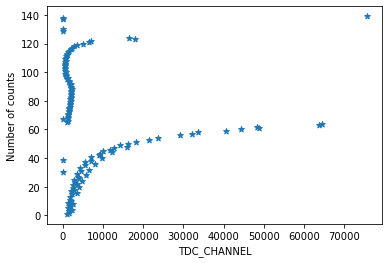

TDC channel with FPGA=1:


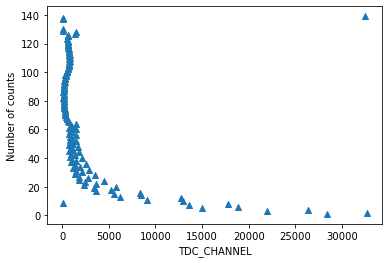

In [26]:
# 7)  Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel
fpga0 = pd.DataFrame(data.loc[data['FPGA']==0])
fpga1 = pd.DataFrame(data.loc[data['FPGA']==1])

#fpga0

count0 = fpga0['TDC_CHANNEL'].value_counts() #how many different values in TDC_CHANNEL
print(count0)
v0 = count0.values # all different values in TDC
k0 = count0.keys() # all positions of these values


#fpga1
count1 = fpga1['TDC_CHANNEL'].value_counts()
v1 = count1.values
k1 = count1.keys()

import matplotlib.pyplot as plt
print("TDC channel with FPGA=0:")
plt.scatter(v0,k0, marker = '*')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('Number of counts')
plt.show()

print("TDC channel with FPGA=1:")
plt.scatter(v1,k1, marker = '^')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('Number of counts')
plt.show()

In [29]:
# 8) Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)
n = 3
data['TDC_CHANNEL'].value_counts()[:n]

139    108059
64      66020
63      64642
Name: TDC_CHANNEL, dtype: int64

In [31]:
Noisy = (data['TDC_CHANNEL'].value_counts()).groupby((data['TDC_CHANNEL'].value_counts())).nlargest(3)
print("Most noisy channels: \n", Noisy[:3])

Most noisy channels: 
 139    108059
64      66020
63      64642
Name: TDC_CHANNEL, dtype: int64


In [32]:
# 9) Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139
unique = data['ORBIT_CNT'].unique().shape[0]
print("Unique: ", unique)
tdc139 = data[data['TDC_CHANNEL'] == 139]
unique = tdc139['ORBIT_CNT'].unique().shape[0]
print("Unique TDC_CHANNEL = 139: ", unique)

Unique:  11001
Unique TDC_CHANNEL = 139:  10976
